# **Import libraies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Display top 10 Rows from dataset**

In [ ]:
df=pd.read_csv('heart_disease_uci.csv',encoding='latin-1')
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


# **Check data type of each column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# **Check Null values in Dataset**

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# **Find Exact missing value row**

In [ ]:
rows_missing=df[df.isnull().any(axis=1)]
rows_missing

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,88,53,Female,Cleveland,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,upsloping,0.0,NaN,0
166,167,52,Male,Cleveland,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,NaN,normal,0
192,193,43,Male,Cleveland,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,flat,NaN,reversable defect,1
266,267,52,Male,Cleveland,asymptomatic,128.0,204.0,True,normal,156.0,True,1.0,flat,0.0,NaN,2
287,288,58,Male,Cleveland,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,flat,NaN,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0



# **Handling missing value using sklearn**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['sex'] = le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])
df['dataset'] = le.fit_transform(df['dataset'])
df['exang'] = le.fit_transform(df['exang'])

In [ ]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.0,0,0.0,3,NaN,3,1
916,917,62,1,3,3,NaN,139.0,0,2,NaN,2,NaN,3,NaN,3,0
917,918,55,1,3,0,122.0,223.0,1,2,100.0,0,0.0,3,NaN,0,2
918,919,58,1,3,0,NaN,385.0,1,0,NaN,2,NaN,3,NaN,3,0


In [ ]:
df.rename(columns={'num':'output'}, inplace=True)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,output
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [ ]:
df['output'] = df['output'].apply(lambda x: 0 if x == 0 else 1)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,output
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [ ]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['fbs'] = df['fbs'].fillna(df['fbs'].mean())
df['restecg'] = df['restecg'].fillna(df['restecg'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['exang'] = df['exang'].fillna(df['exang'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['slope'] = df['slope'].fillna(df['slope'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mean())

In [ ]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,output
0,1,63,1,0,3,145.000000,233.0,1,0,150.000000,0,2.300000,0,0.000000,0,0
1,2,67,1,0,0,160.000000,286.0,0,0,108.000000,1,1.500000,1,3.000000,1,1
2,3,67,1,0,0,120.000000,229.0,0,0,129.000000,1,2.600000,1,2.000000,2,1
3,4,37,1,0,2,130.000000,250.0,0,1,187.000000,0,3.500000,0,0.000000,1,0
4,5,41,0,0,1,130.000000,204.0,0,0,172.000000,0,1.400000,2,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.000000,333.0,1,2,154.000000,0,0.000000,3,0.676375,3,1
916,917,62,1,3,3,132.132404,139.0,0,2,137.545665,2,0.878788,3,0.676375,3,0
917,918,55,1,3,0,122.000000,223.0,1,2,100.000000,0,0.000000,3,0.676375,0,1
918,919,58,1,3,0,132.132404,385.0,1,0,137.545665,2,0.878788,3,0.676375,3,0


In [ ]:
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
output      0
dtype: int64


<Axes: ylabel='Frequency'>

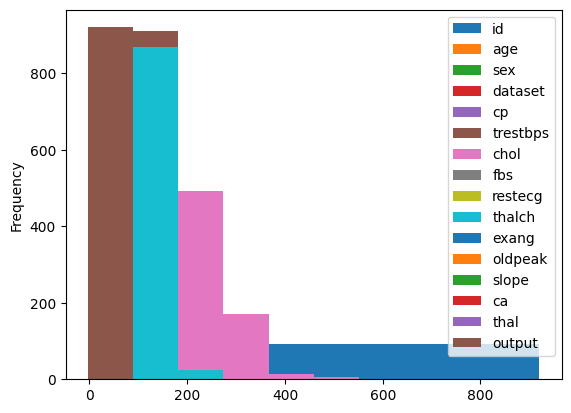

In [ ]:
df.plot.hist()

<Axes: xlabel='age', ylabel='slope'>

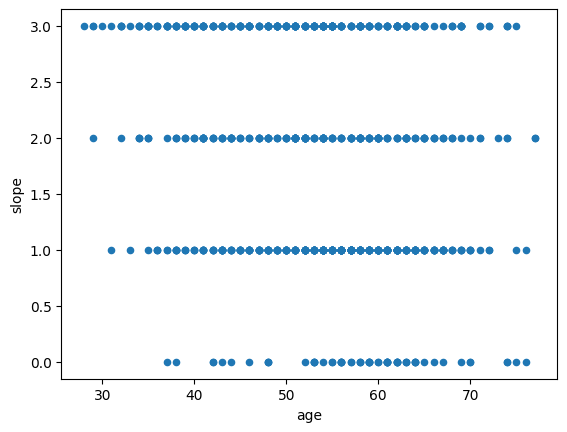

In [ ]:
df.plot.scatter(x='age',y='slope')

# Explore the distribution of the target variable

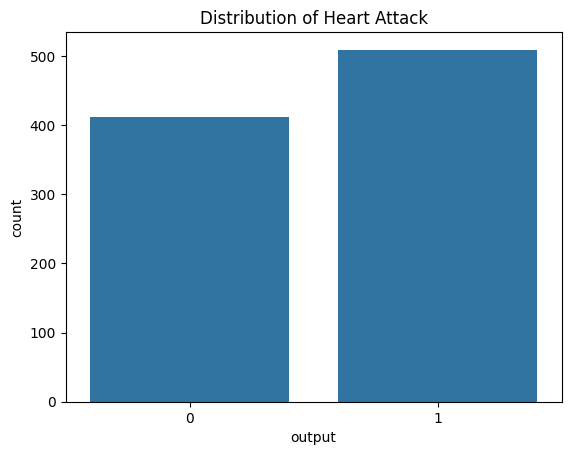

In [ ]:
import seaborn as sns
sns.countplot(x='output', data=df)
plt.title('Distribution of Heart Attack')
plt.show()

# Explore correlations between features

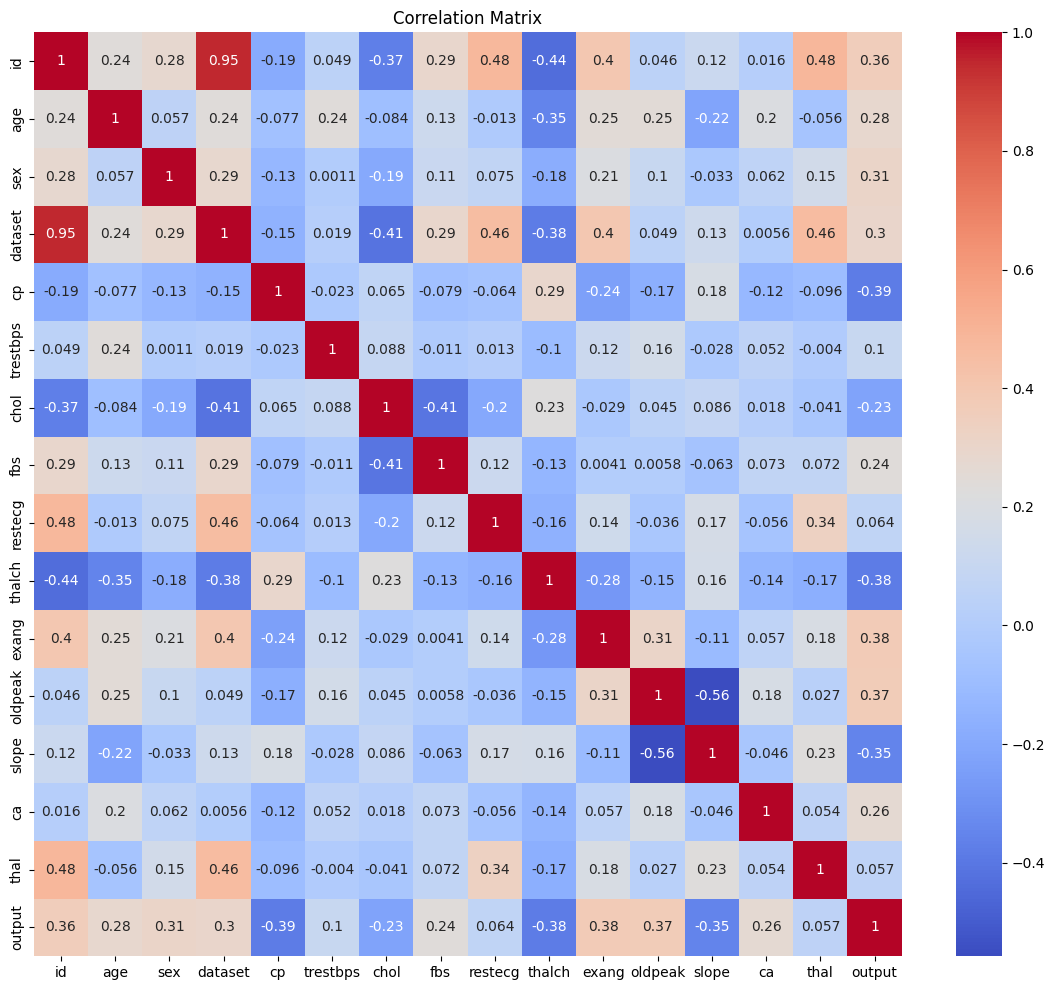

In [ ]:
plt.figure(figsize=(14,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

# Split the data into features (X) and target variable (y)

In [ ]:
X = df.drop('output', axis=1)
y = df['output']

# Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}


In [ ]:
from sklearn.metrics import accuracy_score
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.82
Training Decision Tree...
Decision Tree Accuracy: 0.80
Training Random Forest...
Random Forest Accuracy: 0.89
Training SVM...
SVM Accuracy: 0.85
Training KNN...
KNN Accuracy: 0.83
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.85
Training XGBoost...
XGBoost Accuracy: 0.87
Training AdaBoost...
AdaBoost Accuracy: 0.83
Training Naive Bayes...
Naive Bayes Accuracy: 0.82
Training MLP Neural Network...
MLP Neural Network Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.82
Decision Tree Accuracy: 0.82
Random Forest Accuracy: 0.88
SVM Accuracy: 0.85
KNN Accuracy: 0.83
Gradient Boosting Accuracy: 0.85
XGBoost Accuracy: 0.87
AdaBoost Accuracy: 0.83
Naive Bayes Accuracy: 0.82
MLP Neural Network Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# Model Comparison

In [ ]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



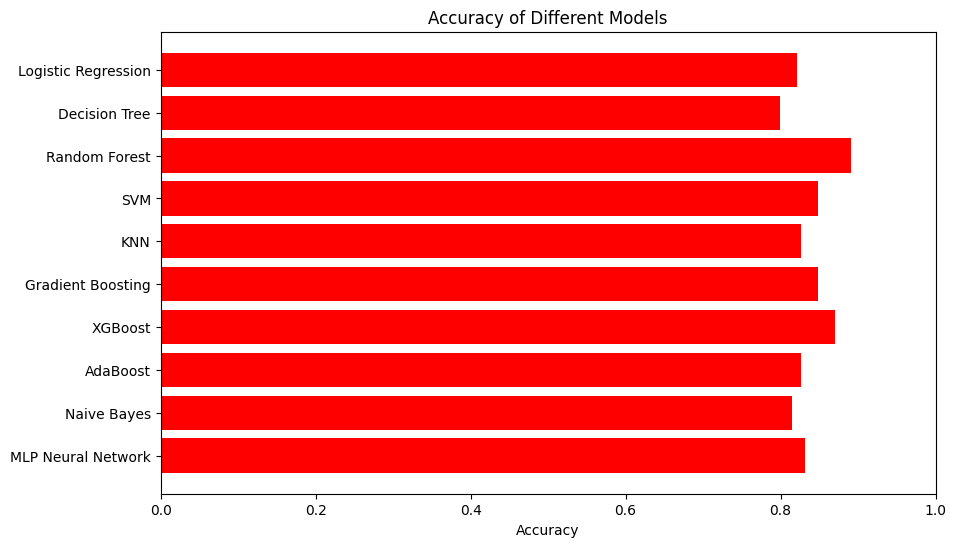

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='red')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()